In [37]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics 

In [38]:
#getting data: using the MNIST dataset

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

#normalize pixel values to be a range of 0-1:
train_images = train_images/255
test_images = test_images/255

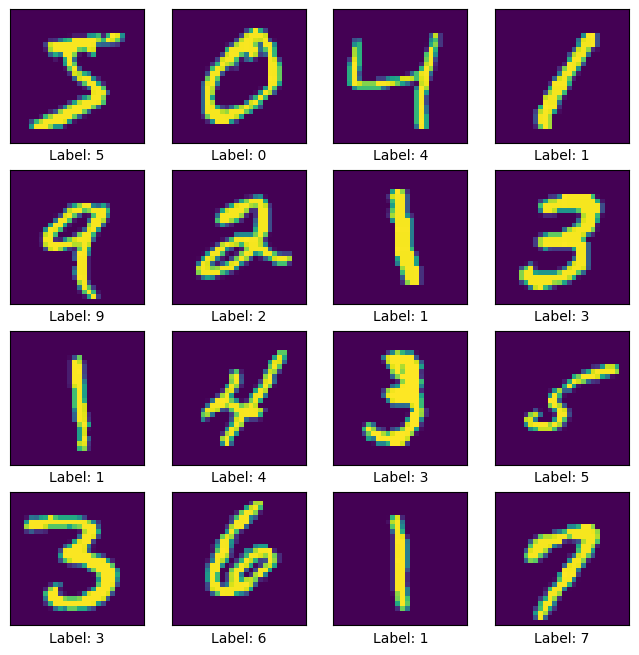

In [39]:
#plotting the first 16 images to check everything looks correct
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(f"Label: {train_labels[i]}")
plt.show()


In [40]:
#define CNN model
model = models.Sequential()
model.add(layers.Input((28, 28, 1)))  #(imageheight, imageswidth, numbercolorchannels)
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

In [41]:
#create the Dense layers (to perform classification)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10)) #10 classes

In [42]:
#display model architechture
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
#train the model
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8973 - loss: 0.3377 - val_accuracy: 0.9838 - val_loss: 0.0555
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9848 - loss: 0.0494 - val_accuracy: 0.9863 - val_loss: 0.0424
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9891 - loss: 0.0340 - val_accuracy: 0.9895 - val_loss: 0.0338
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9927 - loss: 0.0245 - val_accuracy: 0.9908 - val_loss: 0.0312
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9935 - loss: 0.0191 - val_accuracy: 0.9914 - val_loss: 0.0279


In [44]:
#saving the model's weights and architecture
model.save('model.keras')

313/313 - 1s - 3ms/step - accuracy: 0.9914 - loss: 0.0279
Accuracy of model = 0.9914
Test loss of model = 0.0279


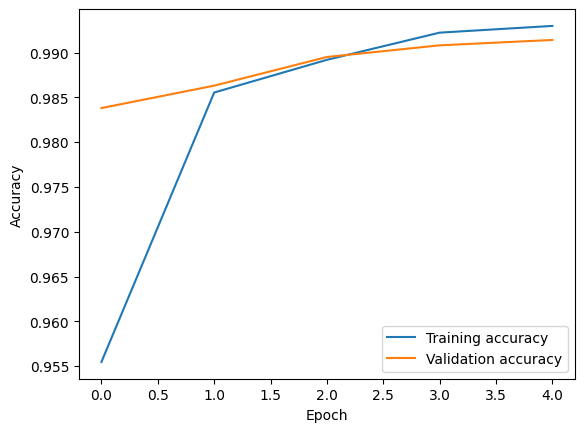

In [45]:
#evaluate the model
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

print(f"Accuracy of model = {test_accuracy:.4f}")
print(f"Test loss of model = {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


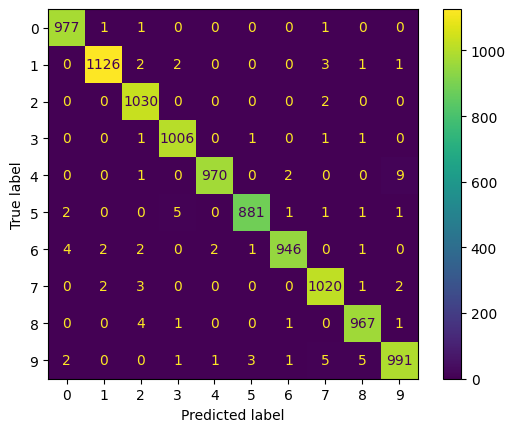

In [46]:
#confusion matrix
y_true = test_labels
results = model.predict(test_images)
y_pred = np.argmax(results, axis=1)

conf_matrix = sklearn.metrics.confusion_matrix(y_true, y_pred)
display = sklearn.metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=list(range(10)))
display.plot()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


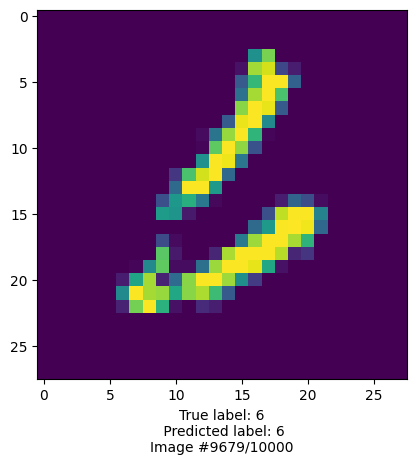

In [54]:
#single example image
n = len(test_images)
index = np.random.choice(n)
image = test_images[index]
true_label = test_labels[index]
pred = model.predict(np.array([image,]))
pred_label = np.argmax(pred)

plt.figure()
plt.xticks()
plt.yticks()
plt.imshow(test_images[index])
plt.xlabel(f"True label: {true_label}\n Predicted label: {pred_label}\nImage #{index}/{n}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


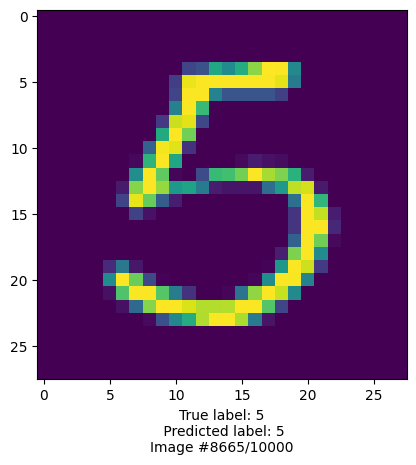

313/313 - 1s - 4ms/step - accuracy: 0.9914 - loss: 0.0279


In [48]:
#testing a reload of the model

new_model = models.load_model("model.keras")

n = len(test_images)
index = np.random.choice(n)
image = test_images[index]
true_label = test_labels[index]
pred = new_model.predict(np.array([image,]))
pred_label = np.argmax(pred)

plt.figure()
plt.xticks()
plt.yticks()
plt.imshow(test_images[index])
plt.xlabel(f"True label: {true_label}\n Predicted label: {pred_label}\nImage #{index}/{n}")
plt.show()

test_loss, test_accuracy = new_model.evaluate(test_images, test_labels, verbose=2)
